##LSTM Driven Stock Price Prediction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AAPL.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)


<ipython-input-3-5eba5e8da01f>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("/content/drive/MyDrive/AAPL.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)


In [4]:
print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (1258, 6)
Null Value Present: False


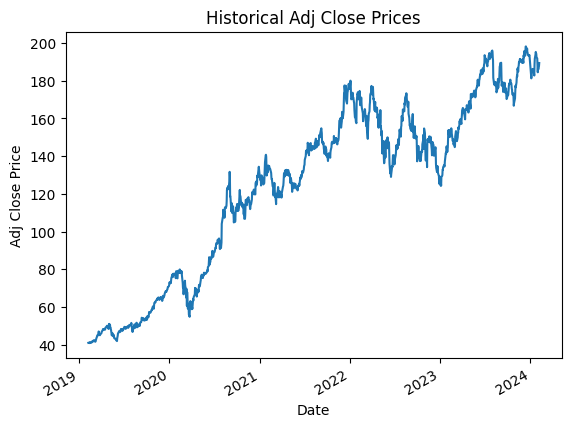

In [5]:
df['Adj Close'].plot()
plt.title('Historical Adj Close Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

In [6]:
# Prepare data
output_var = df['Adj Close']
features = ['Open', 'High', 'Low', 'Volume']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [7]:
X = df[features]
y = output_var

In [8]:
timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Reshape data for LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


In [9]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=6, verbose=1, shuffle=False)

Epoch 1/100
191/191 [==============================] - 4s 4ms/step - loss: 15542.3457
Epoch 2/100
191/191 [==============================] - 1s 4ms/step - loss: 13407.2461
Epoch 3/100
191/191 [==============================] - 1s 4ms/step - loss: 9481.5723
Epoch 4/100
191/191 [==============================] - 1s 4ms/step - loss: 5338.3984
Epoch 5/100
191/191 [==============================] - 1s 4ms/step - loss: 2331.1289
Epoch 6/100
191/191 [==============================] - 1s 4ms/step - loss: 767.6998
Epoch 7/100
191/191 [==============================] - 1s 4ms/step - loss: 206.3696
Epoch 8/100
191/191 [==============================] - 1s 4ms/step - loss: 74.4159
Epoch 9/100
191/191 [==============================] - 1s 5ms/step - loss: 54.4405
Epoch 10/100
191/191 [==============================] - 1s 6ms/step - loss: 50.7839
Epoch 11/100
191/191 [==============================] - 1s 7ms/step - loss: 47.5626
Epoch 12/100
191/191 [==============================] - 1s 5ms/step - l

In [11]:
y_pred = lstm.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.828610517428772
R-squared: 0.9728088085078395


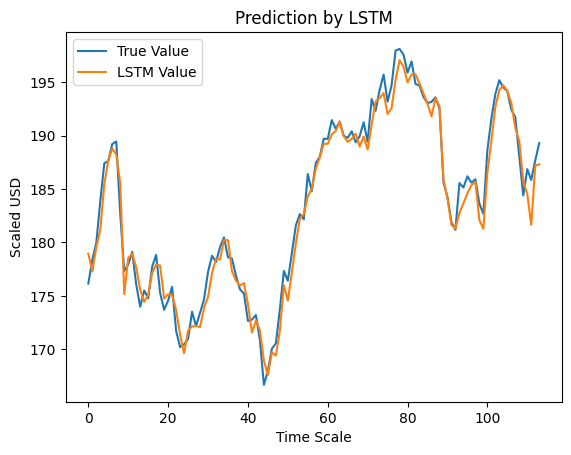

In [13]:
plt.plot(y_test.values, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()